# Bankruptcy Prevention Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("bankruptcy-prevention.xlsx",index_col=0)
data.head()

""
industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0.5;1;0;0;0;0.5;bankruptcy
0;1;0;0;0;1;bankruptcy
1;0;0;0;0;1;bankruptcy
0.5;0;0;0.5;0;1;bankruptcy
1;1;0;0;0;1;bankruptcy


In [3]:
data.to_csv('bankruptcy-prevention.csv')

In [4]:
df = pd.read_csv('bankruptcy-prevention.csv', sep = ';')

##### Removing Special Character

In [5]:
df.columns = df.columns.str.replace(' ', '')

In [6]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

##### Displaying the First 5 Rows of the Dataset

In [7]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


##### Displaying the Last 5 Rows of the Dataset

In [8]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [9]:
df.shape

(250, 7)

In [10]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [12]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Identifying Missing Values

In [13]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

##### Visualizing the Missing Values using Heatmap

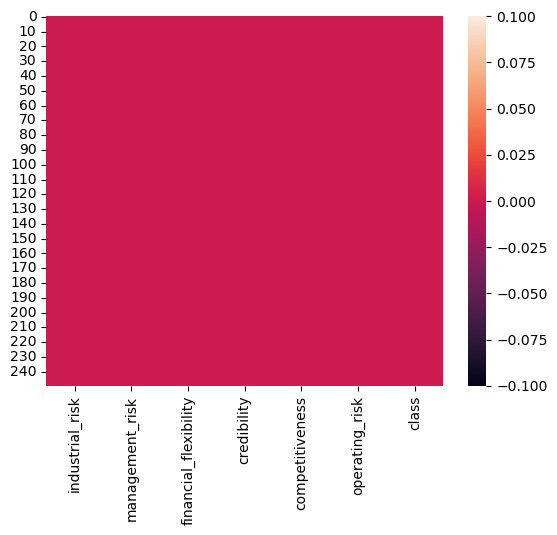

In [14]:
snb.heatmap(df.isnull())
plt.show()

### Checking for Class Imbalance

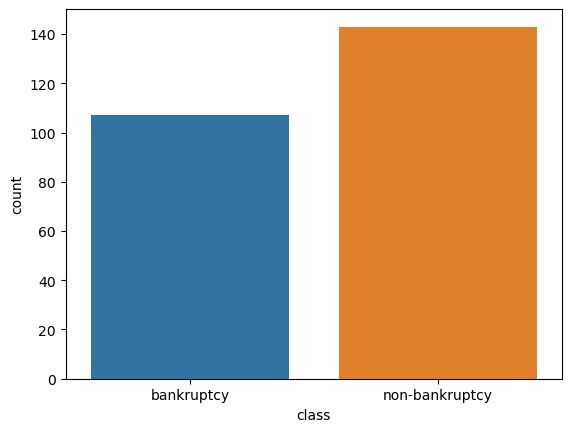

In [15]:
snb.countplot(x='class', data=df)
plt.show()

In [16]:
# df['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

##### Grouping the dataset by the Target Variable and Calculating the Statistics

In [17]:
class_stats = df.groupby('class').agg(['count', 'mean', 'std'])
class_stats

industrial_risk                     management_risk            \
                         count      mean       std           count      mean   
class                                                                          
bankruptcy                 107  0.626168  0.412616             107  0.789720   
non-bankruptcy             143  0.437063  0.393016             143  0.482517   

                         financial_flexibility                      \
                     std                 count      mean       std   
class                                                                
bankruptcy      0.336725                   107  0.028037  0.134441   
non-bankruptcy  0.412876                   143  0.636364  0.331353   

               credibility                     competitiveness            \
                     count      mean       std           count      mean   
class                                                                      
bankruptcy             107  0.107477  0.238193             107  0.018692   
non-bankruptcy         143  0.741259  0.295823             143  0.818182   

                         operating_risk                      
                     std          count      mean       std  
class                                                        
bankruptcy      0.095296            107  0.710280  0.388741  
non-bankruptcy  0.241368            143  0.465035  0.438669

##### Checking the Count of each Columns

In [18]:
cat = df.columns.to_list()
print("Value count:\n")
for col in cat:
    print(col,"\n",df[col].value_counts(),"\n")

Value count:

industrial_risk 
 industrial_risk
1.0    89
0.5    81
0.0    80
Name: count, dtype: int64 

management_risk 
 management_risk
1.0    119
0.5     69
0.0     62
Name: count, dtype: int64 

financial_flexibility 
 financial_flexibility
0.0    119
0.5     74
1.0     57
Name: count, dtype: int64 

credibility 
 credibility
0.0    94
1.0    79
0.5    77
Name: count, dtype: int64 

competitiveness 
 competitiveness
0.0    103
1.0     91
0.5     56
Name: count, dtype: int64 

operating_risk 
 operating_risk
1.0    114
0.0     79
0.5     57
Name: count, dtype: int64 

class 
 class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64 



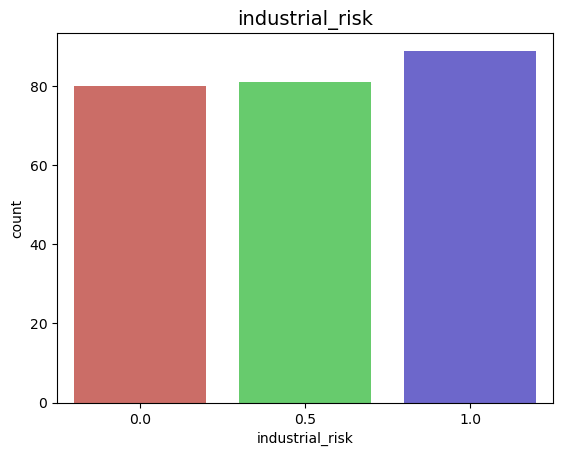

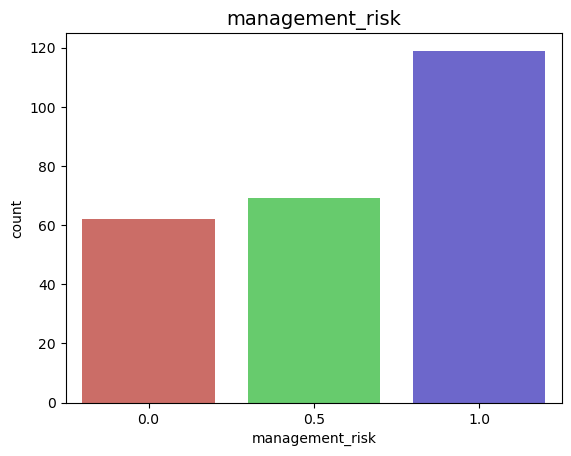

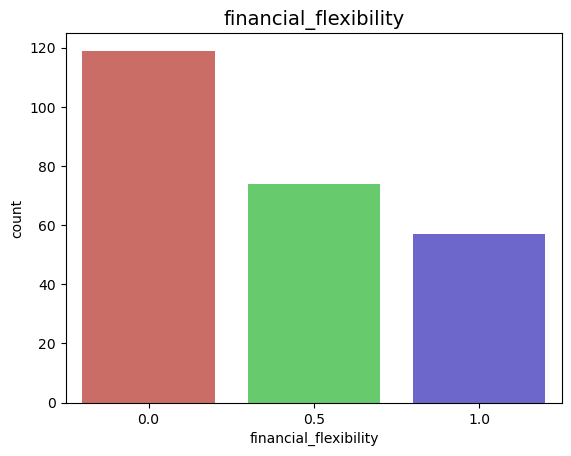

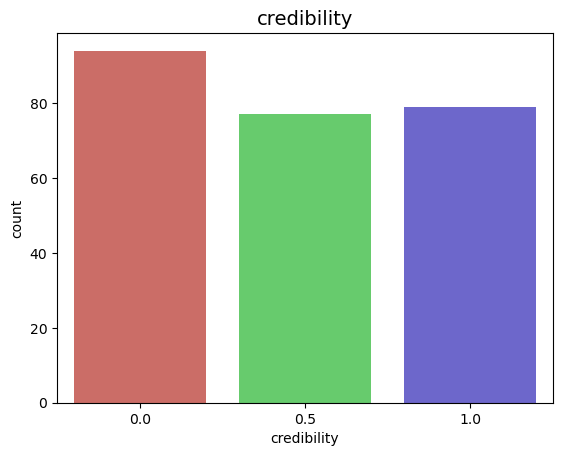

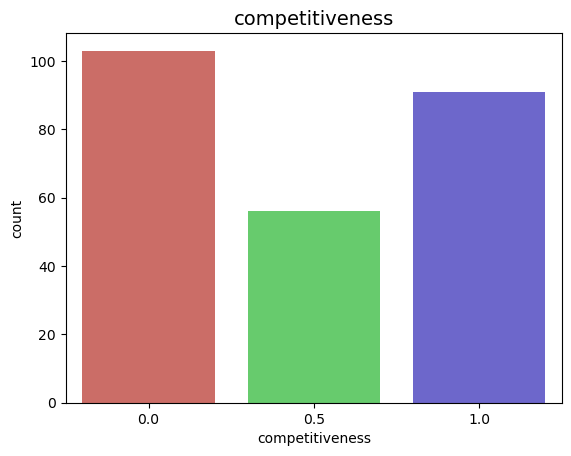

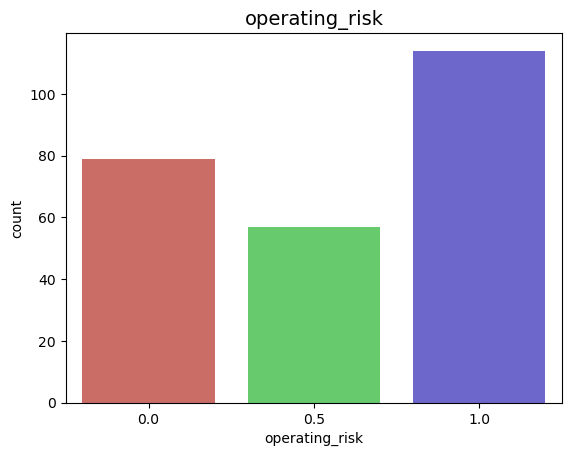

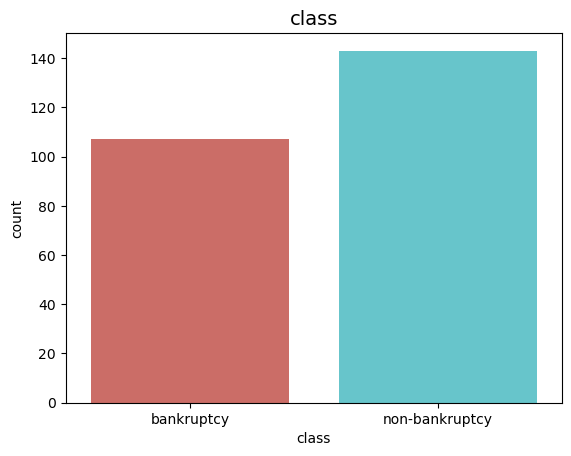

In [19]:
for col in cat[0:]:
    snb.countplot(x=col, data=df, palette='hls')
    plt.title(col, fontsize=14)
    plt.show()

Most of the industrial risk count is equal to 80 or above 80 high risk count in industrial risk

Count of Management risk is high is equal to 120 and low and medium count is between 60-70

Most of finiancial fexibility is low count

credibility is almost similar in low,medium and high

In our dataset most of data competitiveness is low or high

In data opertaing risk is high

as we can see in our data non-bankruptcy has a high count

##### Checking the Correlation between Variables

In [20]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
correlation_matrix

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


[Text(0.5, 0, 'industrial_risk'),
 Text(1.5, 0, 'management_risk'),
 Text(2.5, 0, 'financial_flexibility'),
 Text(3.5, 0, 'credibility'),
 Text(4.5, 0, 'competitiveness'),
 Text(5.5, 0, 'operating_risk')]

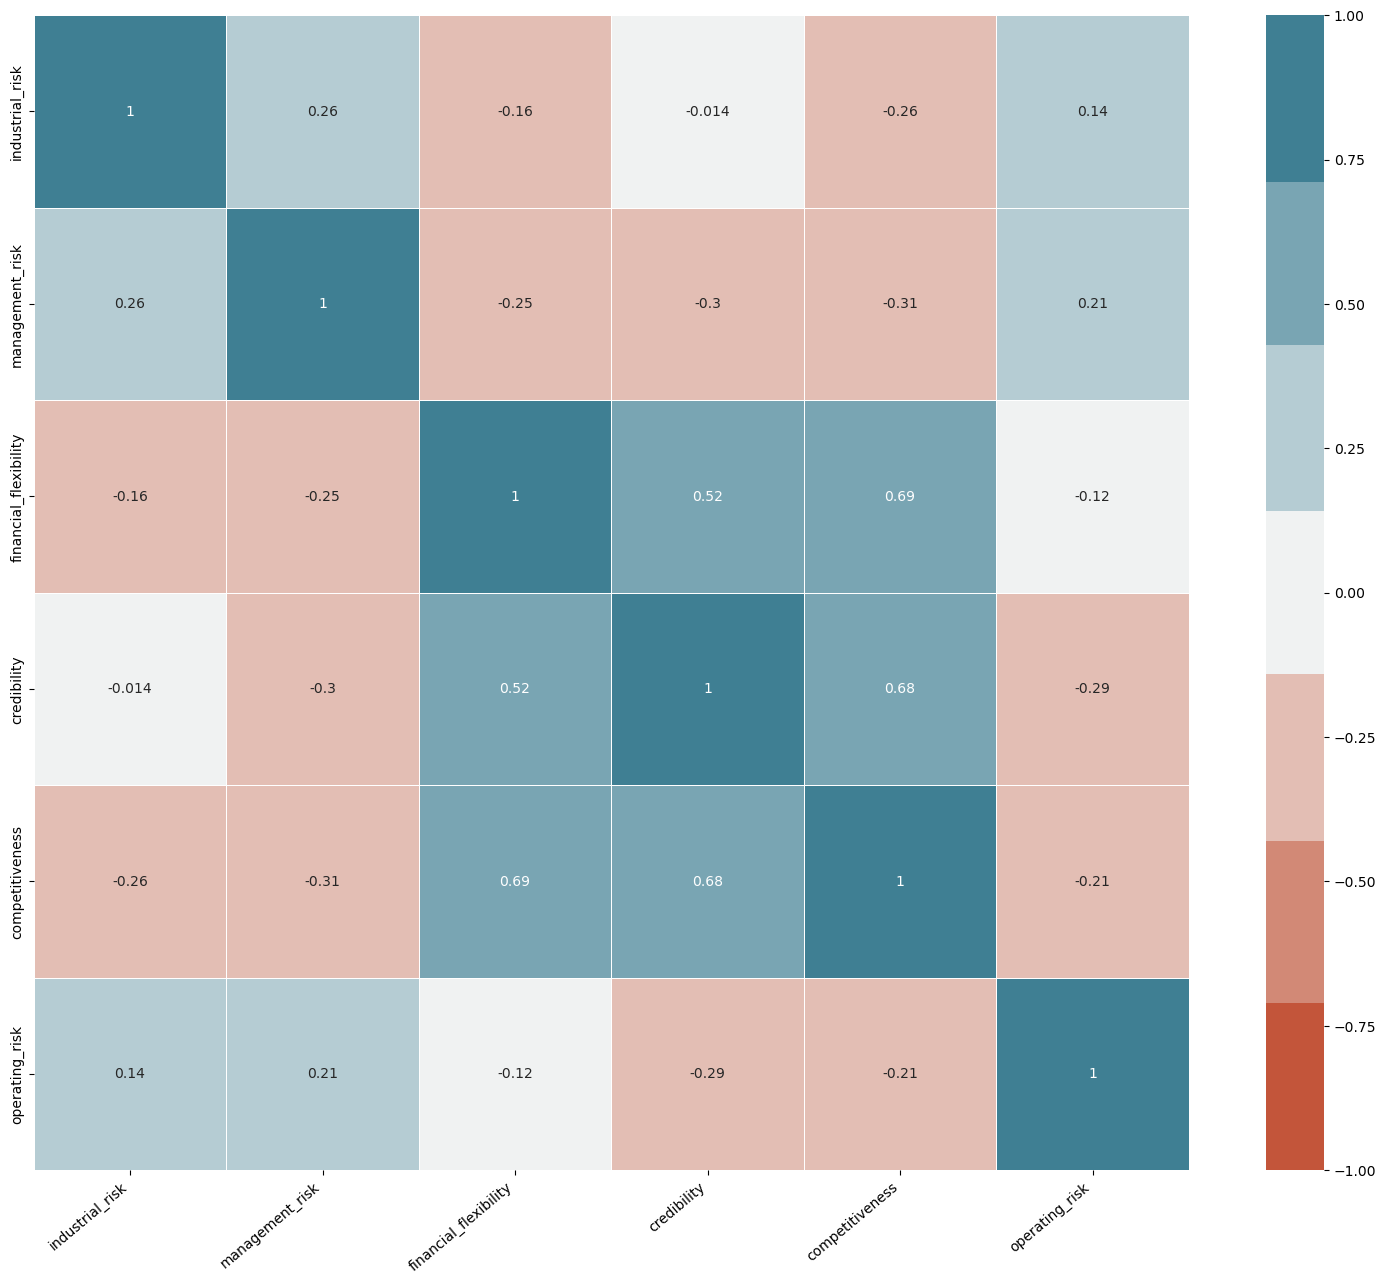

In [21]:
corr = correlation_matrix
plt.subplots(figsize=(20,15))
ax = snb.heatmap(

    corr,
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=snb.diverging_palette(20, 220, n=7),
    square=True,
    linewidths=.5,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,
    horizontalalignment='right'

)

industrial risk and management risk is mostly correlated with each other

financial flexibility is highly correlated with competitivness and credibility

similarly, competitivness is correlated with financial flexibility and credibility

similar for credibility

operating risk is correlated with industrial risk and management risk

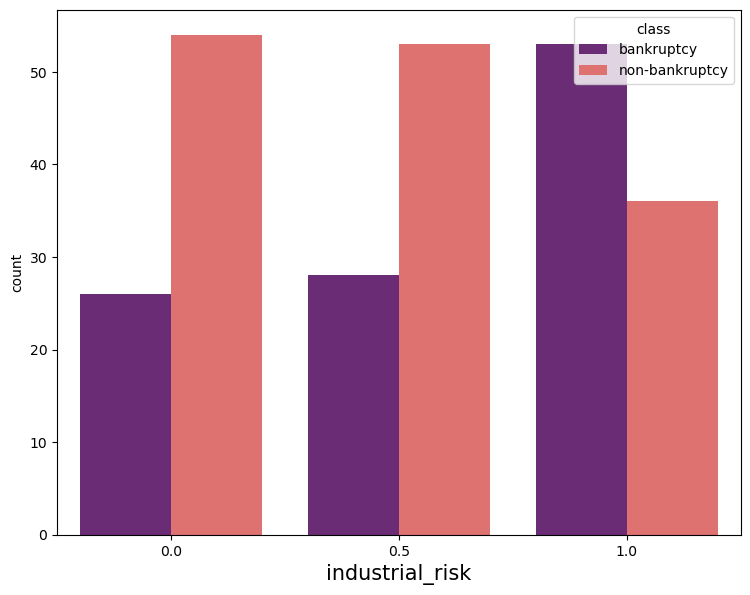

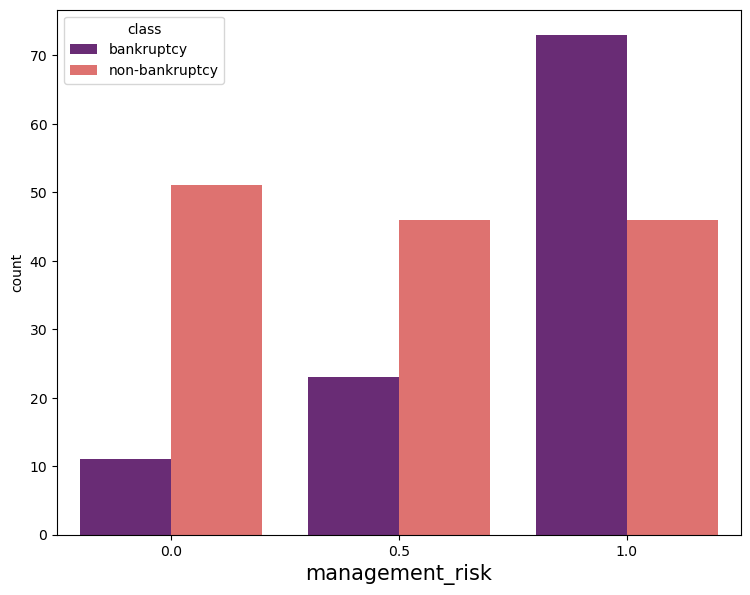

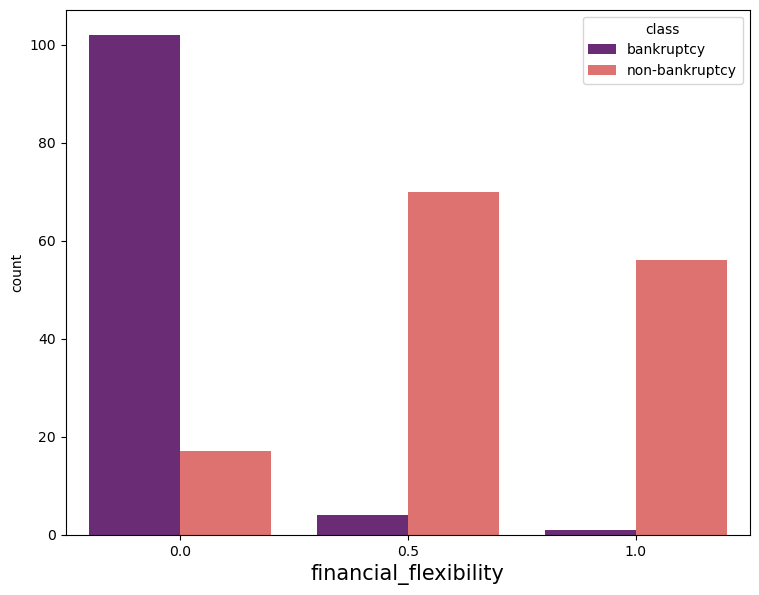

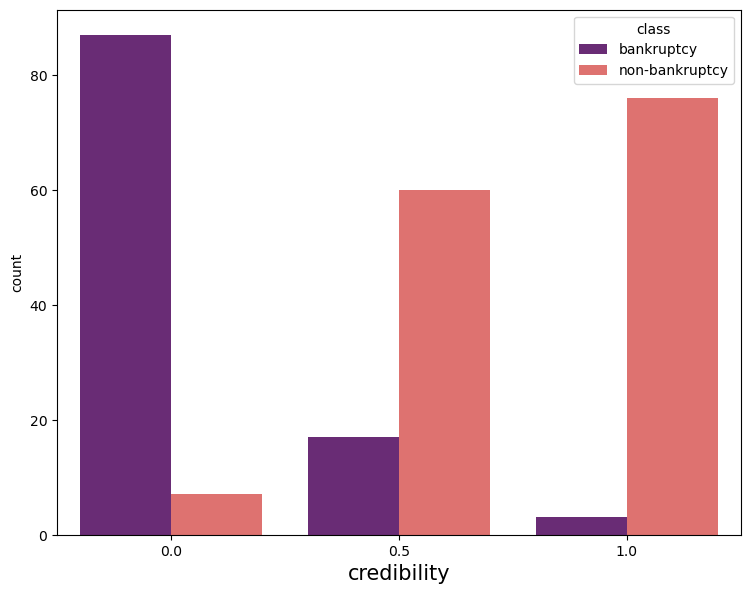

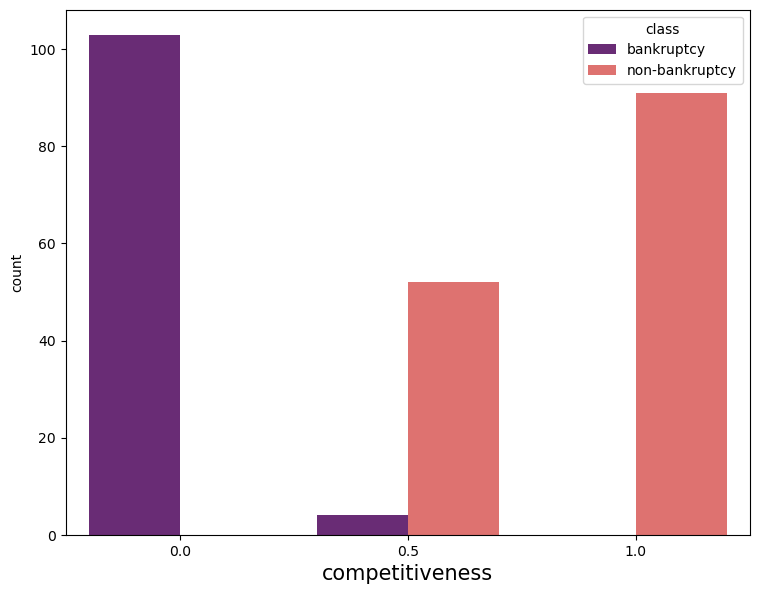

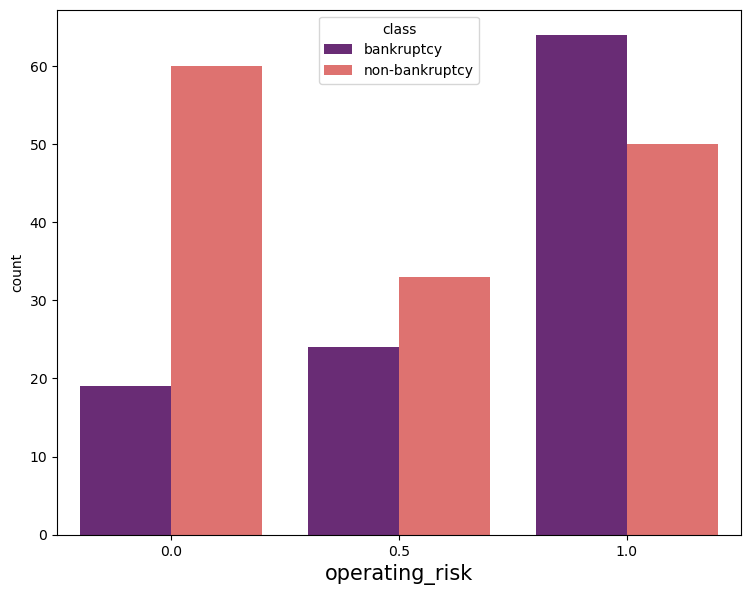

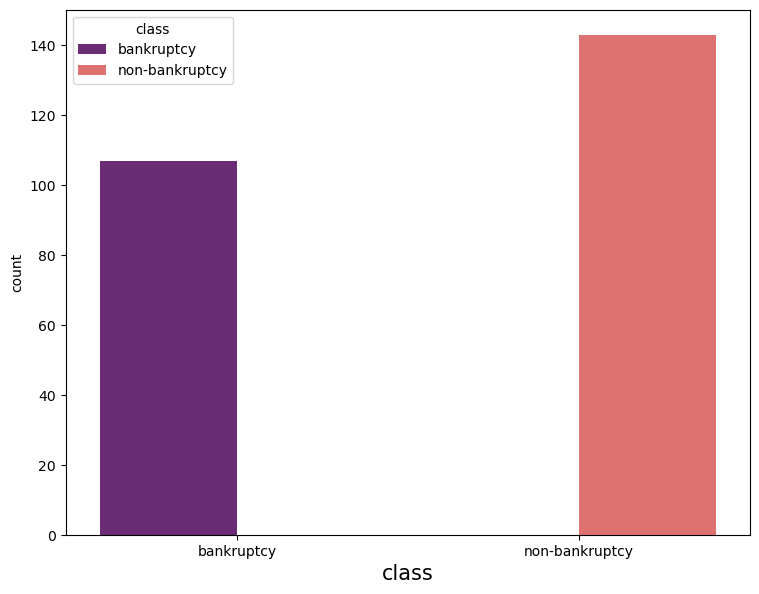

In [22]:
for col in cat[0:]:
    plt.figure(figsize=(30,15))
    plt.subplot(2,3,1)
    snb.countplot(x=col ,hue='class', data=df, palette='magma')
    plt.xlabel(col, fontsize=15)

### Encoding the Data

In [23]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
df['class'] = label_encoder.fit_transform(df['class'])
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


##### Here Bankruptcy is encoded with 0 and Non-Bankruptcy is encoded with 1

##### Checking the Outliers

<Axes: >

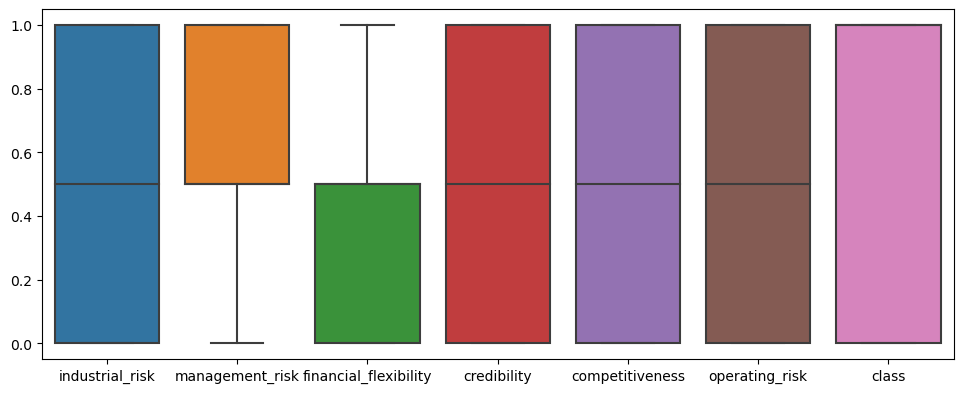

In [26]:
plt.figure(figsize=(40,10))
plt.subplot(2,3,1)
snb.boxplot(data=df)

##### Bar plot for the distribution of each categorical variable

In [27]:
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    snb.countplot(x=col, data=df, hue='class', palette='husl')
    plt.title(f'Distribution of {col} by Class')
    plt.show()

##### Pairplot to visualize relationships between different variables

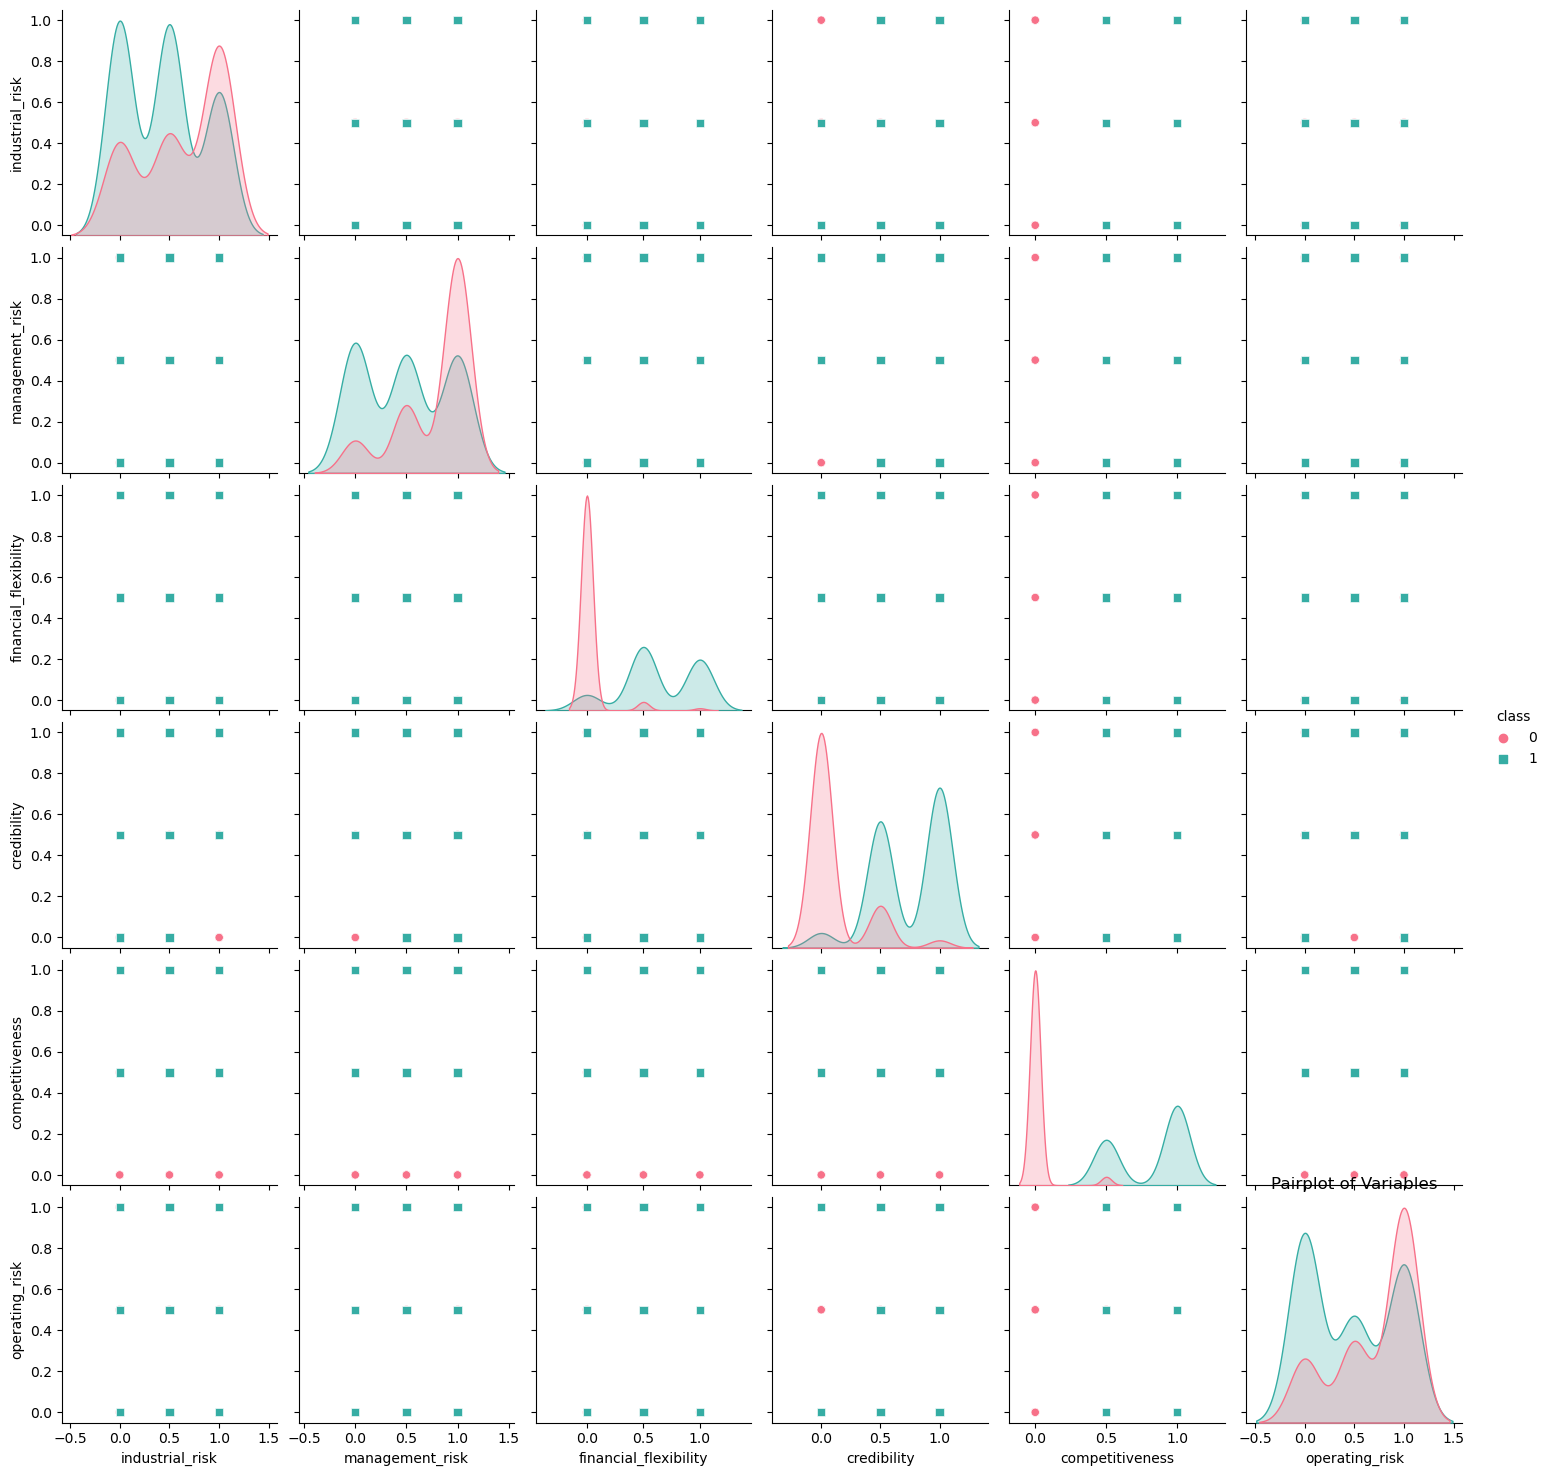

In [28]:
snb.pairplot(df, hue='class', markers=["o", "s"], palette='husl')
plt.title('Pairplot of Variables')
plt.show()

##### Histogram for each Variable

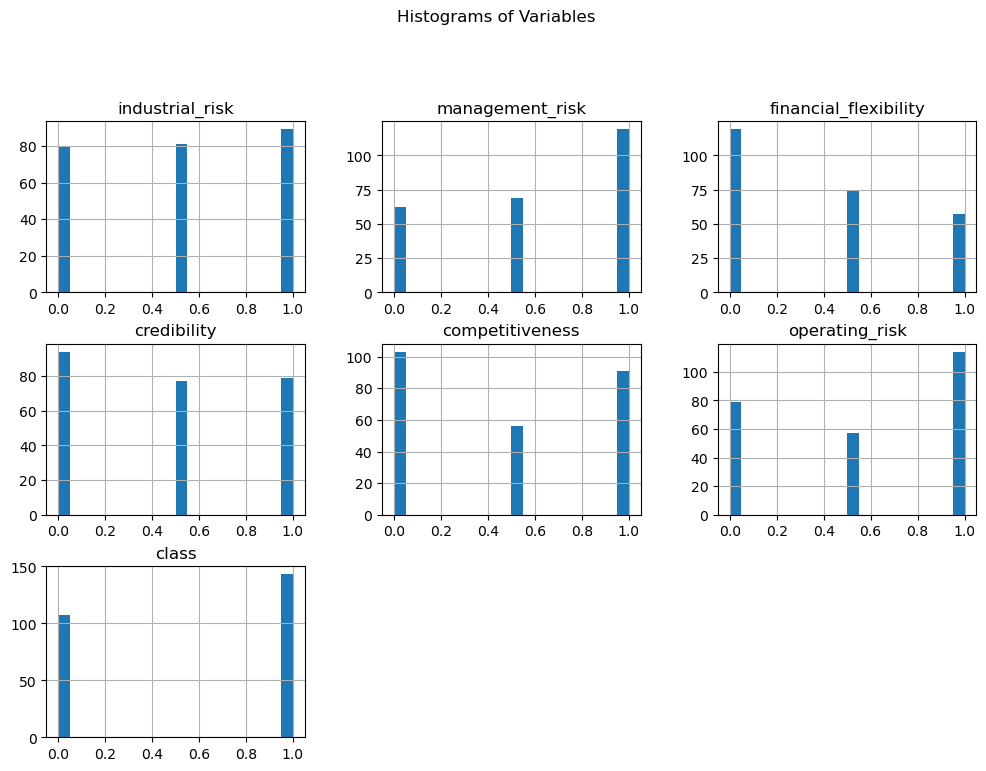

In [29]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Variables', y=1.02)
plt.show()

##### Violin Plot for each Variable

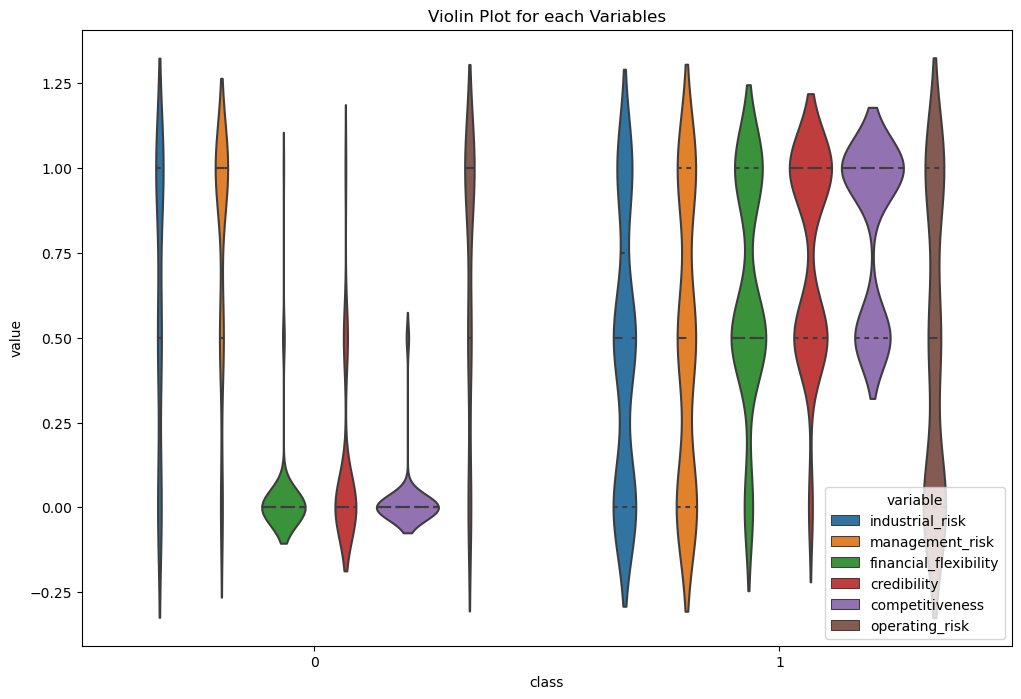

In [30]:
plt.figure(figsize=(12, 8))
snb.violinplot(
    x='class',
    y='value',
    data=pd.melt(df, 'class'),
    hue='variable',
    inner="quart"
)
plt.title('Violin Plot for each Variables')
plt.show()

##### Checking Unique Values

In [31]:
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

##### Distribution Plot for each Numerical Value

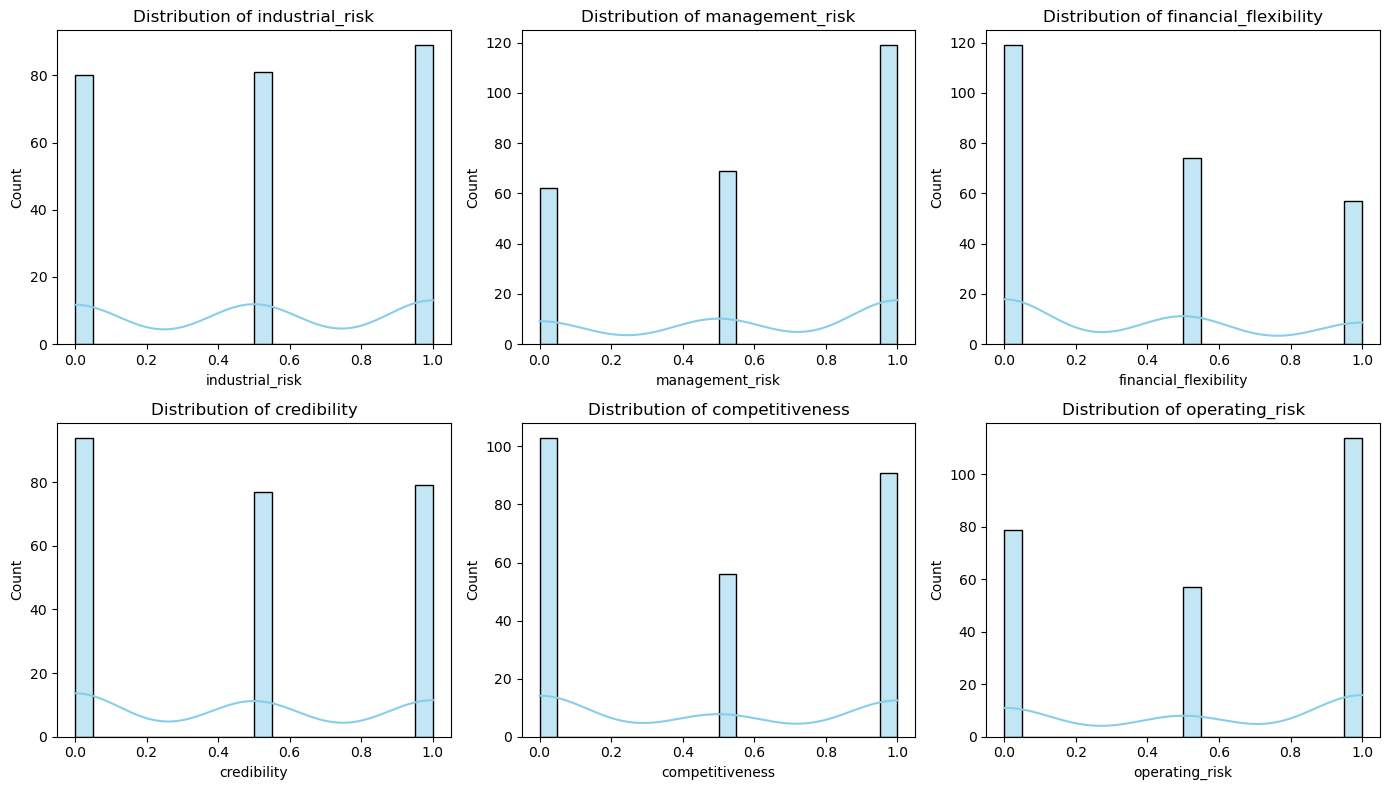

In [32]:
numerical_columns = df.select_dtypes(include='float').columns
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    snb.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### Swarm Plot for Numerical Variables by Class

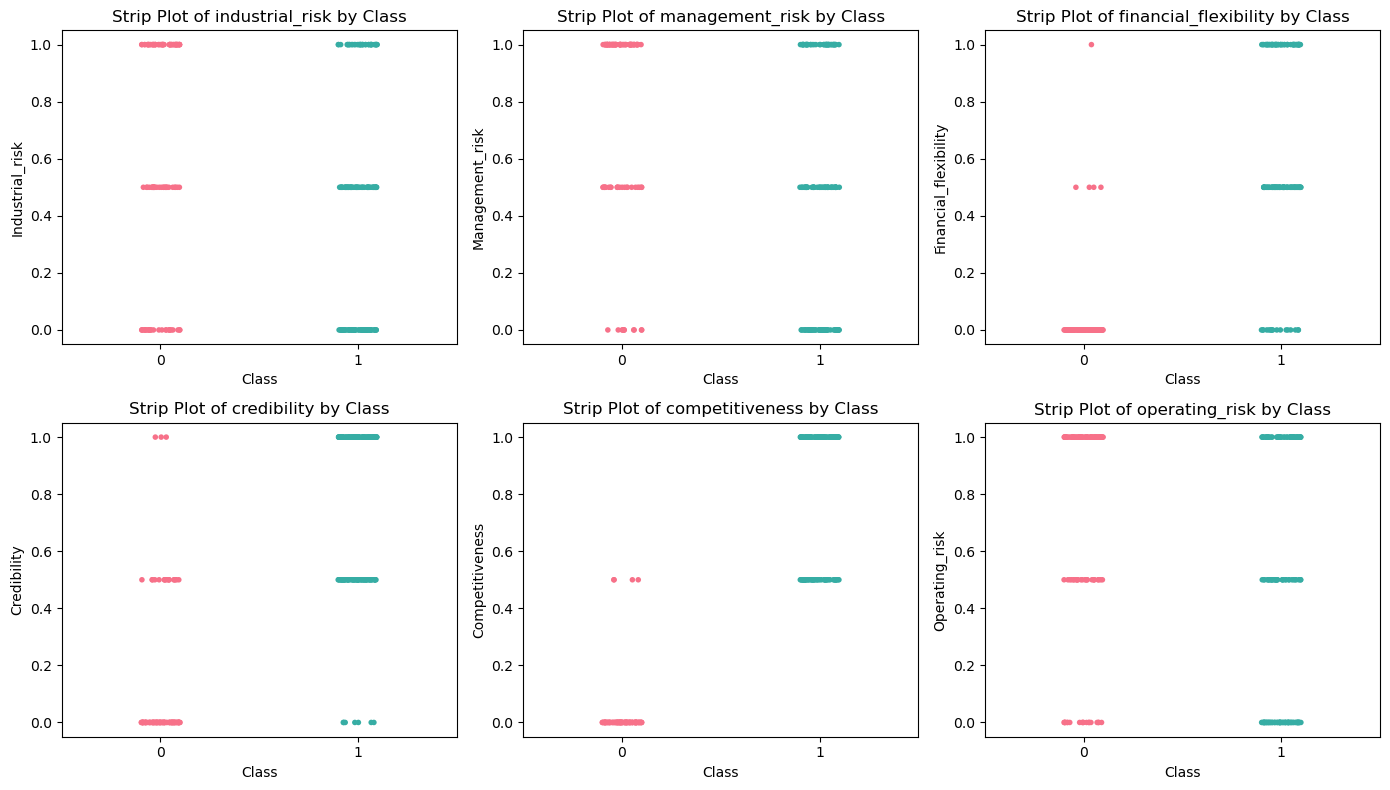

In [33]:
plt.figure(figsize=(14,8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    snb.stripplot(x='class', y=col, data=df, palette='husl', size=4, jitter=True)

    # Setting Labels and Title
    plt.xlabel('Class')
    plt.ylabel(col.capitalize())
    plt.title(f'Strip Plot of {col} by Class')

    # Customize ticks for better readability if needed
    # plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

plt.tight_layout()
plt.show()

##### Scatterplot Matrix to Visualize Relationships and Potential Outliers

<Figure size 1200x1000 with 0 Axes>

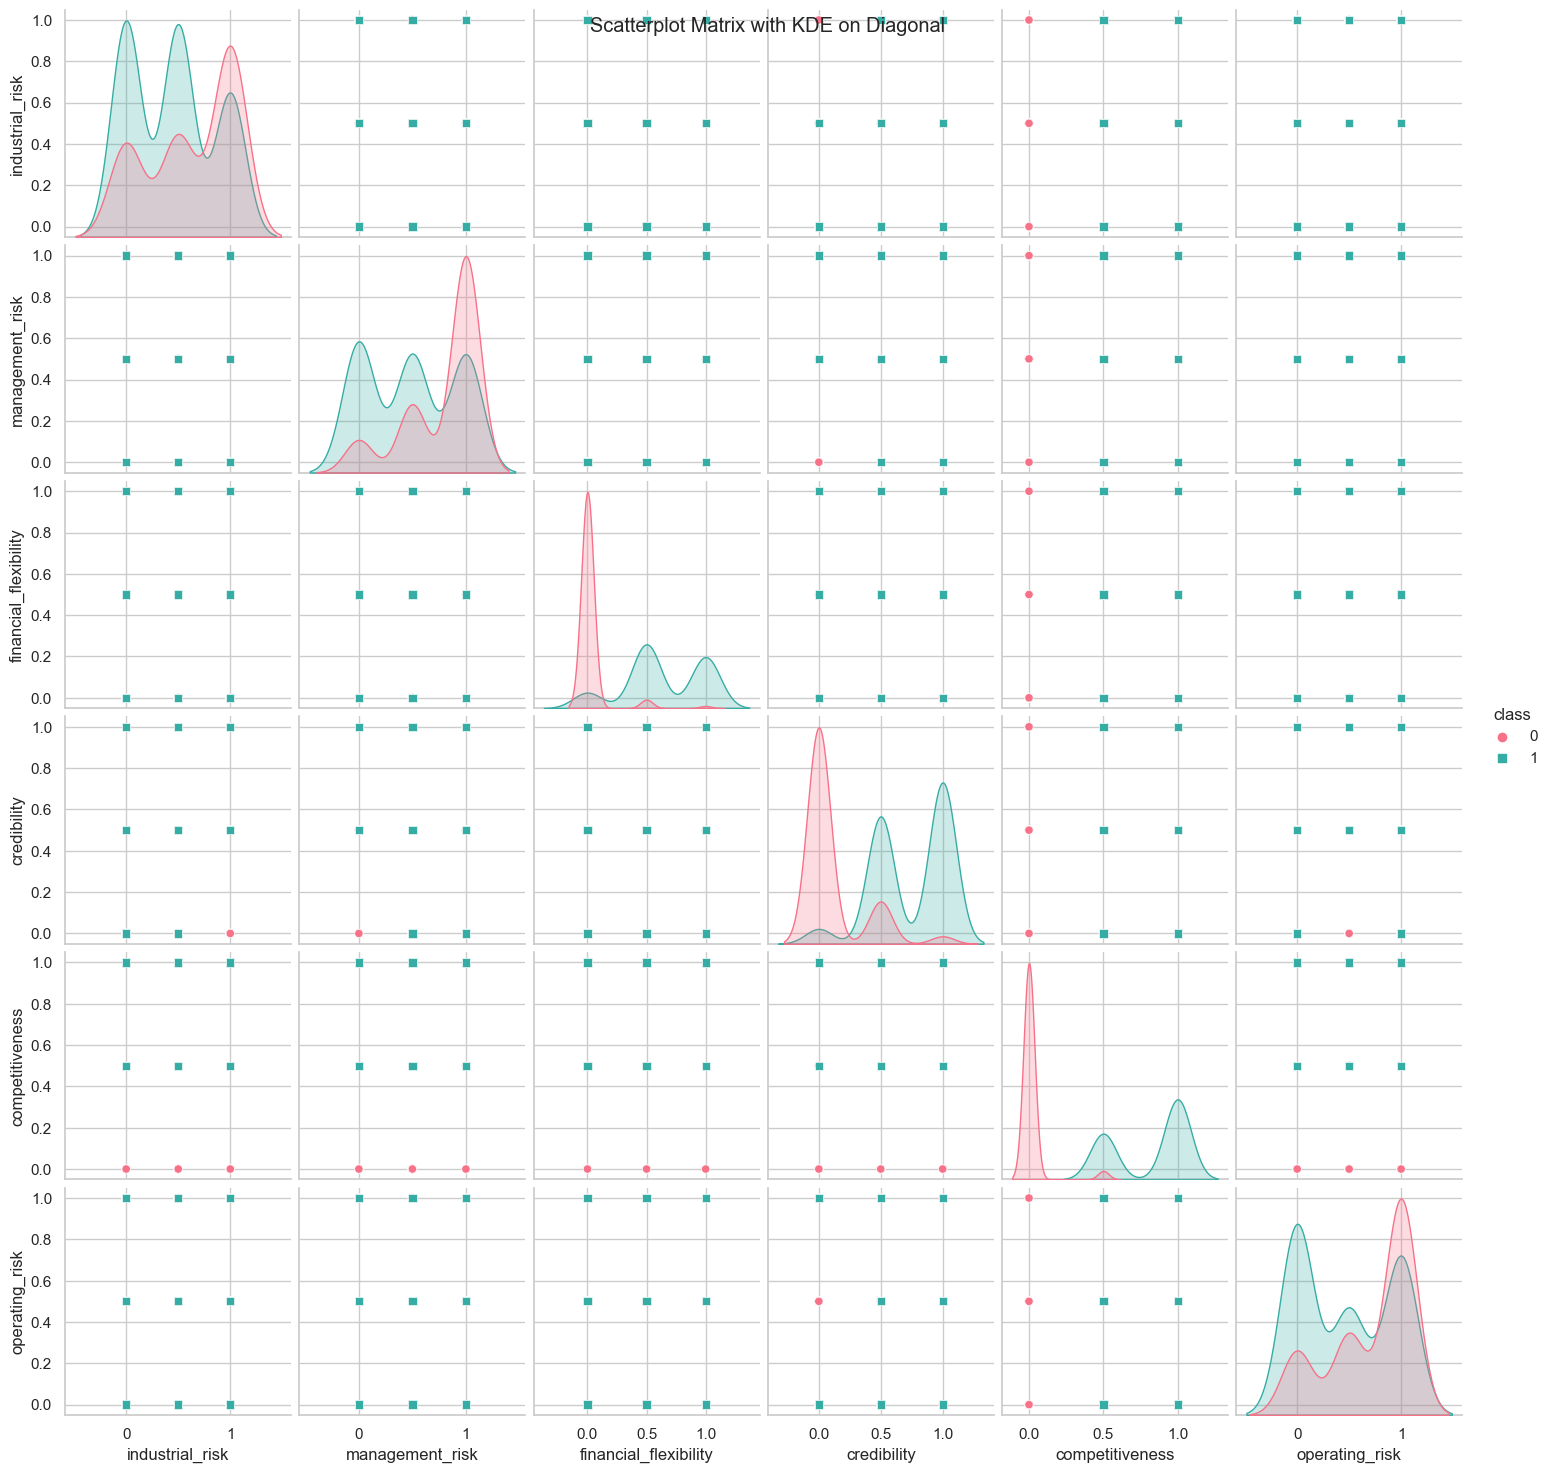

In [34]:
snb.set(style="whitegrid")
plt.figure(figsize=(12, 10))
snb.pairplot(df, hue='class', markers=["o", "s"], palette='husl', diag_kind='kde')
plt.suptitle('Scatterplot Matrix with KDE on Diagonal')
plt.show()

In [35]:
for idx, col_name in enumerate(df.columns):
    print(f"Column at index {idx}: {col_name}")

Column at index 0: industrial_risk
Column at index 1: management_risk
Column at index 2: financial_flexibility
Column at index 3: credibility
Column at index 4: competitiveness
Column at index 5: operating_risk
Column at index 6: class


In [36]:
# Delete column at index position 6 (column 'G')
# index_to_delete = 6
# df.drop(df.columns[index_to_delete], axis=1, inplace=True)

# Display the DataFrame after deleting the column
# print("\nDataFrame after deleting column at index {}: ".format(index_to_delete))
# print(df)

##### Splitting the Data into 'train_test_split'

In [37]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [38]:
features = df.iloc[:,0:6]
features

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [39]:
target = df[['class']] #df.iloc[:,6]
target

,class
0,0
1,0
2,0
3,0
4,0
...,...
245,1
246,1
247,1
248,1


In [40]:
df['class'].value_counts()

class
1    143
0    107
Name: count, dtype: int64

# Model Building

### Building Logit Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=20)

In [43]:
log_model = LogisticRegression()

In [44]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [45]:
log_pred = log_model.predict(x_test)

In [46]:
accuracy_score(y_test, log_pred)

0.9841269841269841

In [47]:
confusion_matrix(y_test, log_pred)

array([[28,  1],
       [ 0, 34]], dtype=int64)

In [48]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        34

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



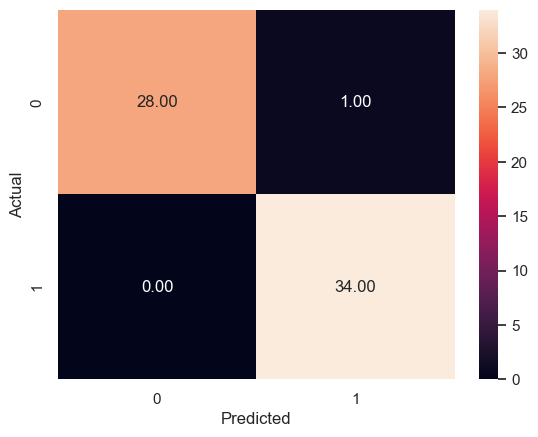

In [49]:
log_cm = confusion_matrix(y_test, log_pred)
snb.heatmap(log_cm, annot=True, fmt='0.2f',
            xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### AUC - ROC Curve

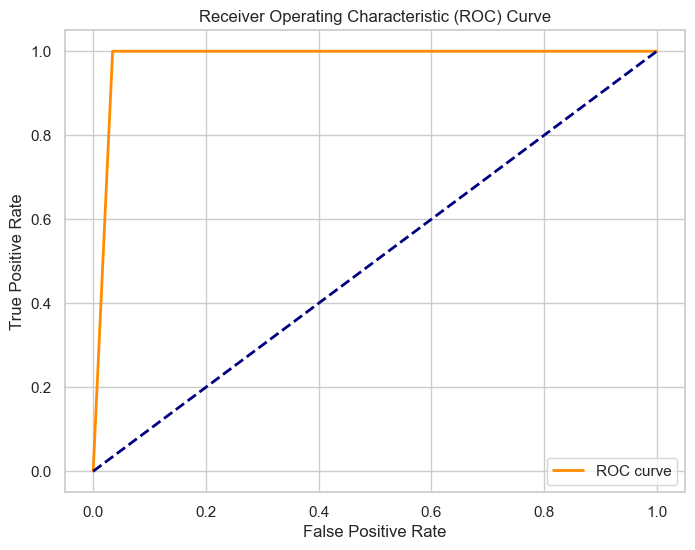

In [50]:
snb.set(style="whitegrid")
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, log_pred)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve') #label='logistic model(area = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### SVC Model

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [52]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=20)

In [53]:
svc = SVC()

In [54]:
svc.fit(x_train, y_train)

SVC()

In [55]:
svc_pred = svc.predict(x_test)

In [56]:
accuracy_score(y_test, svc_pred)

0.9841269841269841

In [57]:
confusion_matrix(y_test, svc_pred)

array([[28,  1],
       [ 0, 34]], dtype=int64)

In [58]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        34

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



### SVC Model with Hyperparameter ('kernel=rbf')

In [59]:
hyp_model = SVC(kernel='rbf',gamma=15, C=1)

In [60]:
hyp_model.fit(x_train, y_train)

SVC(C=1, gamma=15)

In [61]:
param_pred = hyp_model.predict(x_test)

In [62]:
accuracy_score(y_test, param_pred)

0.9841269841269841

In [63]:
confusion_matrix(y_test, param_pred)

array([[28,  1],
       [ 0, 34]], dtype=int64)

In [64]:
print(classification_report(y_test, param_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        34

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



### Grid Search CV Model

In [65]:
clf = SVC()

In [66]:
grid_param = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[0.1, 1, 'scale', 'auto']}]

In [67]:
gsv = GridSearchCV(clf,grid_param,cv=10)

In [68]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'gamma': [0.1, 1, 'scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [69]:
accuracy_score(y_test, log_pred)

0.9841269841269841

In [70]:
gsv.best_params_ , gsv.best_score_

({'gamma': 0.1, 'kernel': 'linear'}, 1.0)

### GSV Model with above Params

In [71]:
param_model = SVC(gamma = 0.1, kernel = 'linear')

In [72]:
param_model.fit(x_train, y_train)

SVC(gamma=0.1, kernel='linear')

In [73]:
param_pred = param_model.predict(x_test)

In [74]:
accuracy_score(y_test, param_pred)

0.9841269841269841

In [75]:
confusion_matrix(y_test, param_pred)

array([[28,  1],
       [ 0, 34]], dtype=int64)

In [76]:
print(classification_report(y_test, param_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        34

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



### KNN Model

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn_model = KNeighborsClassifier()

In [79]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
knn_y_pred = knn_model.predict(x_test)

In [81]:
accuracy_score(y_test, knn_y_pred)

0.9841269841269841

In [82]:
confusion_matrix(y_test, knn_y_pred)

array([[28,  1],
       [ 0, 34]], dtype=int64)

In [83]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        34

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



### KNN Model with Hyper Params

In [84]:
n_neighbors = np.array(range(1,20))

In [85]:
param_grid = dict(n_neighbors=n_neighbors)

In [86]:
knn_hyp_model = KNeighborsClassifier()

In [87]:
grid = GridSearchCV(estimator=knn_hyp_model, param_grid=param_grid)

In [88]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [89]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'n_neighbors': 5}


### KNN Model with above Params

In [90]:
param_knn_model = KNeighborsClassifier(n_neighbors=5)

In [91]:
param_knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
param_knn_y_pred = param_knn_model.predict(x_test)

In [93]:
accuracy_score(y_test, param_knn_y_pred)

0.9841269841269841

In [94]:
confusion_matrix(y_test, param_knn_y_pred)

array([[28,  1],
       [ 0, 34]], dtype=int64)

In [95]:
print(classification_report(y_test, param_knn_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        34

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



### Random Forest Model

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [97]:
num_trees = 100

In [98]:
max_features = 6

In [99]:
kfold = KFold(n_splits=20, shuffle=True)

In [100]:
ran_for_model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

In [101]:
results = cross_val_score(ran_for_model, features, target, cv=kfold)
results

array([1.        , 1.        , 0.92307692, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.92307692, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [102]:
print(np.mean(results))

0.9923076923076923


### Decision Tree Model (criterion= 'entropy', max_depth=6)

In [103]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [104]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=20)

In [105]:
tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=6)

In [106]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [107]:
tree_y_pred = tree_model.predict(x_test)

In [108]:
accuracy_score(y_test, tree_y_pred)

1.0

In [109]:
confusion_matrix(y_test, tree_y_pred)

array([[29,  0],
       [ 0, 34]], dtype=int64)

In [110]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        34

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



##### Visualising Decision Tree

Text(0.5, 1.0, 'Decision Tree')

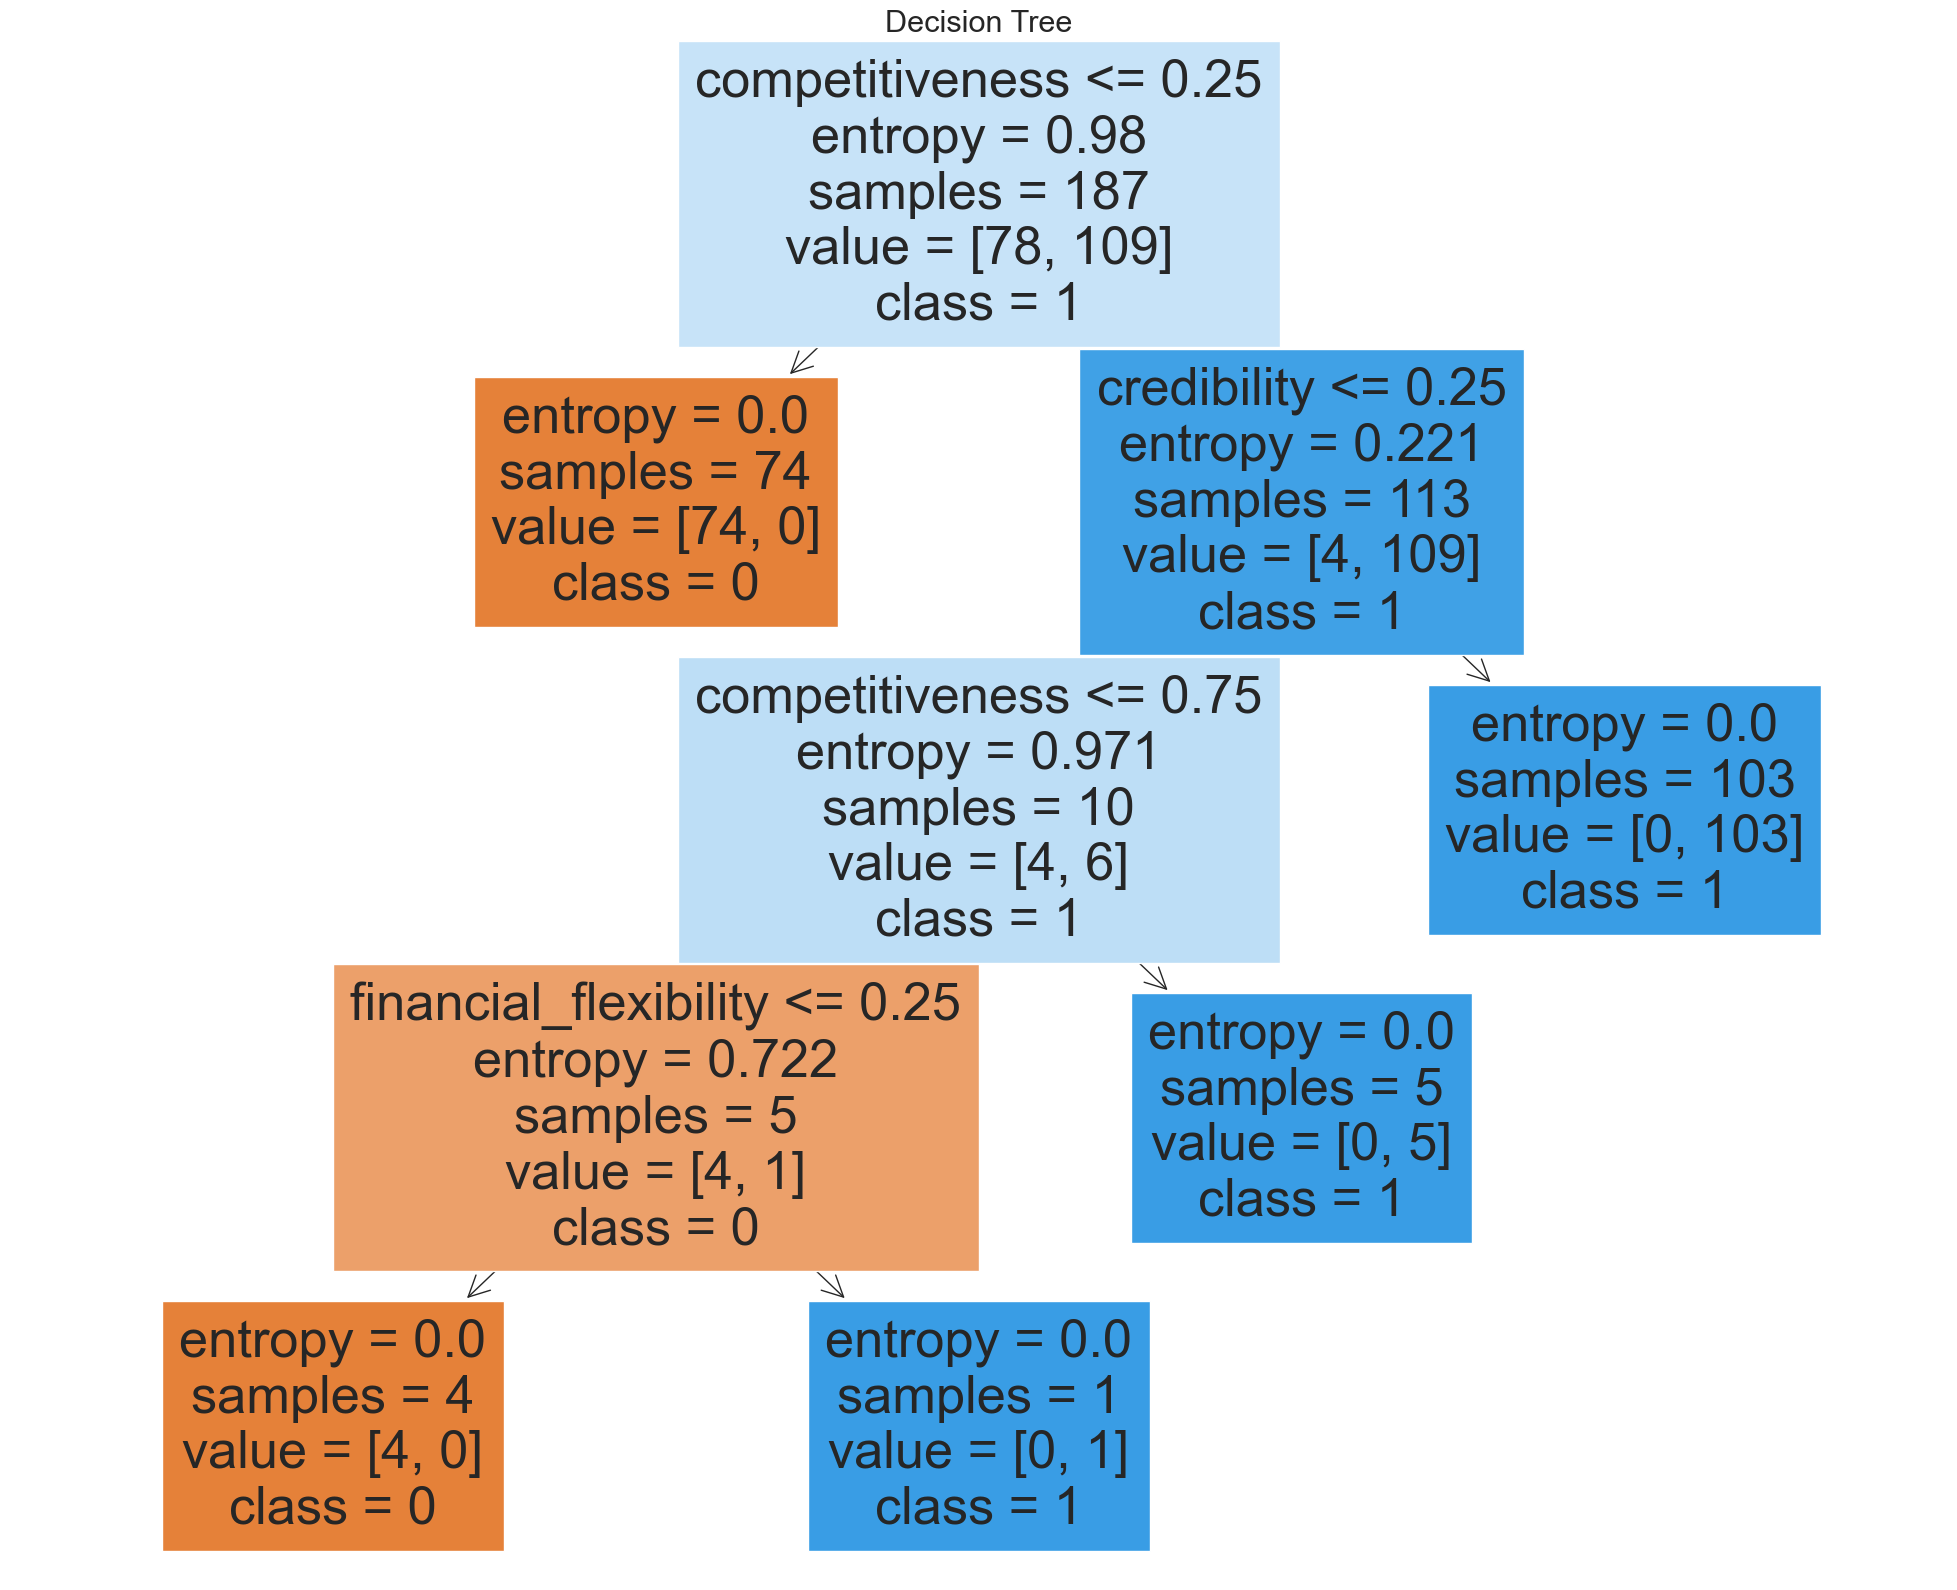

In [111]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(tree_model, feature_names=['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk'], class_names=['0','1'], filled=True, )
plt.title('Decision Tree',fontsize=22)

### Decision Tree Model (criterion= 'gini', max_depth=6)

In [112]:
tree_model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=6)

In [113]:
tree_model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [114]:
tree_gini_y_pred = tree_model_gini.predict(x_test)

In [115]:
accuracy_score(y_test, tree_y_pred)

1.0

In [116]:
confusion_matrix(y_test, tree_y_pred)

array([[29,  0],
       [ 0, 34]], dtype=int64)

In [117]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        34

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



##### Visualising Decision Tree

Text(0.5, 1.0, 'Decision Tree (Gini)')

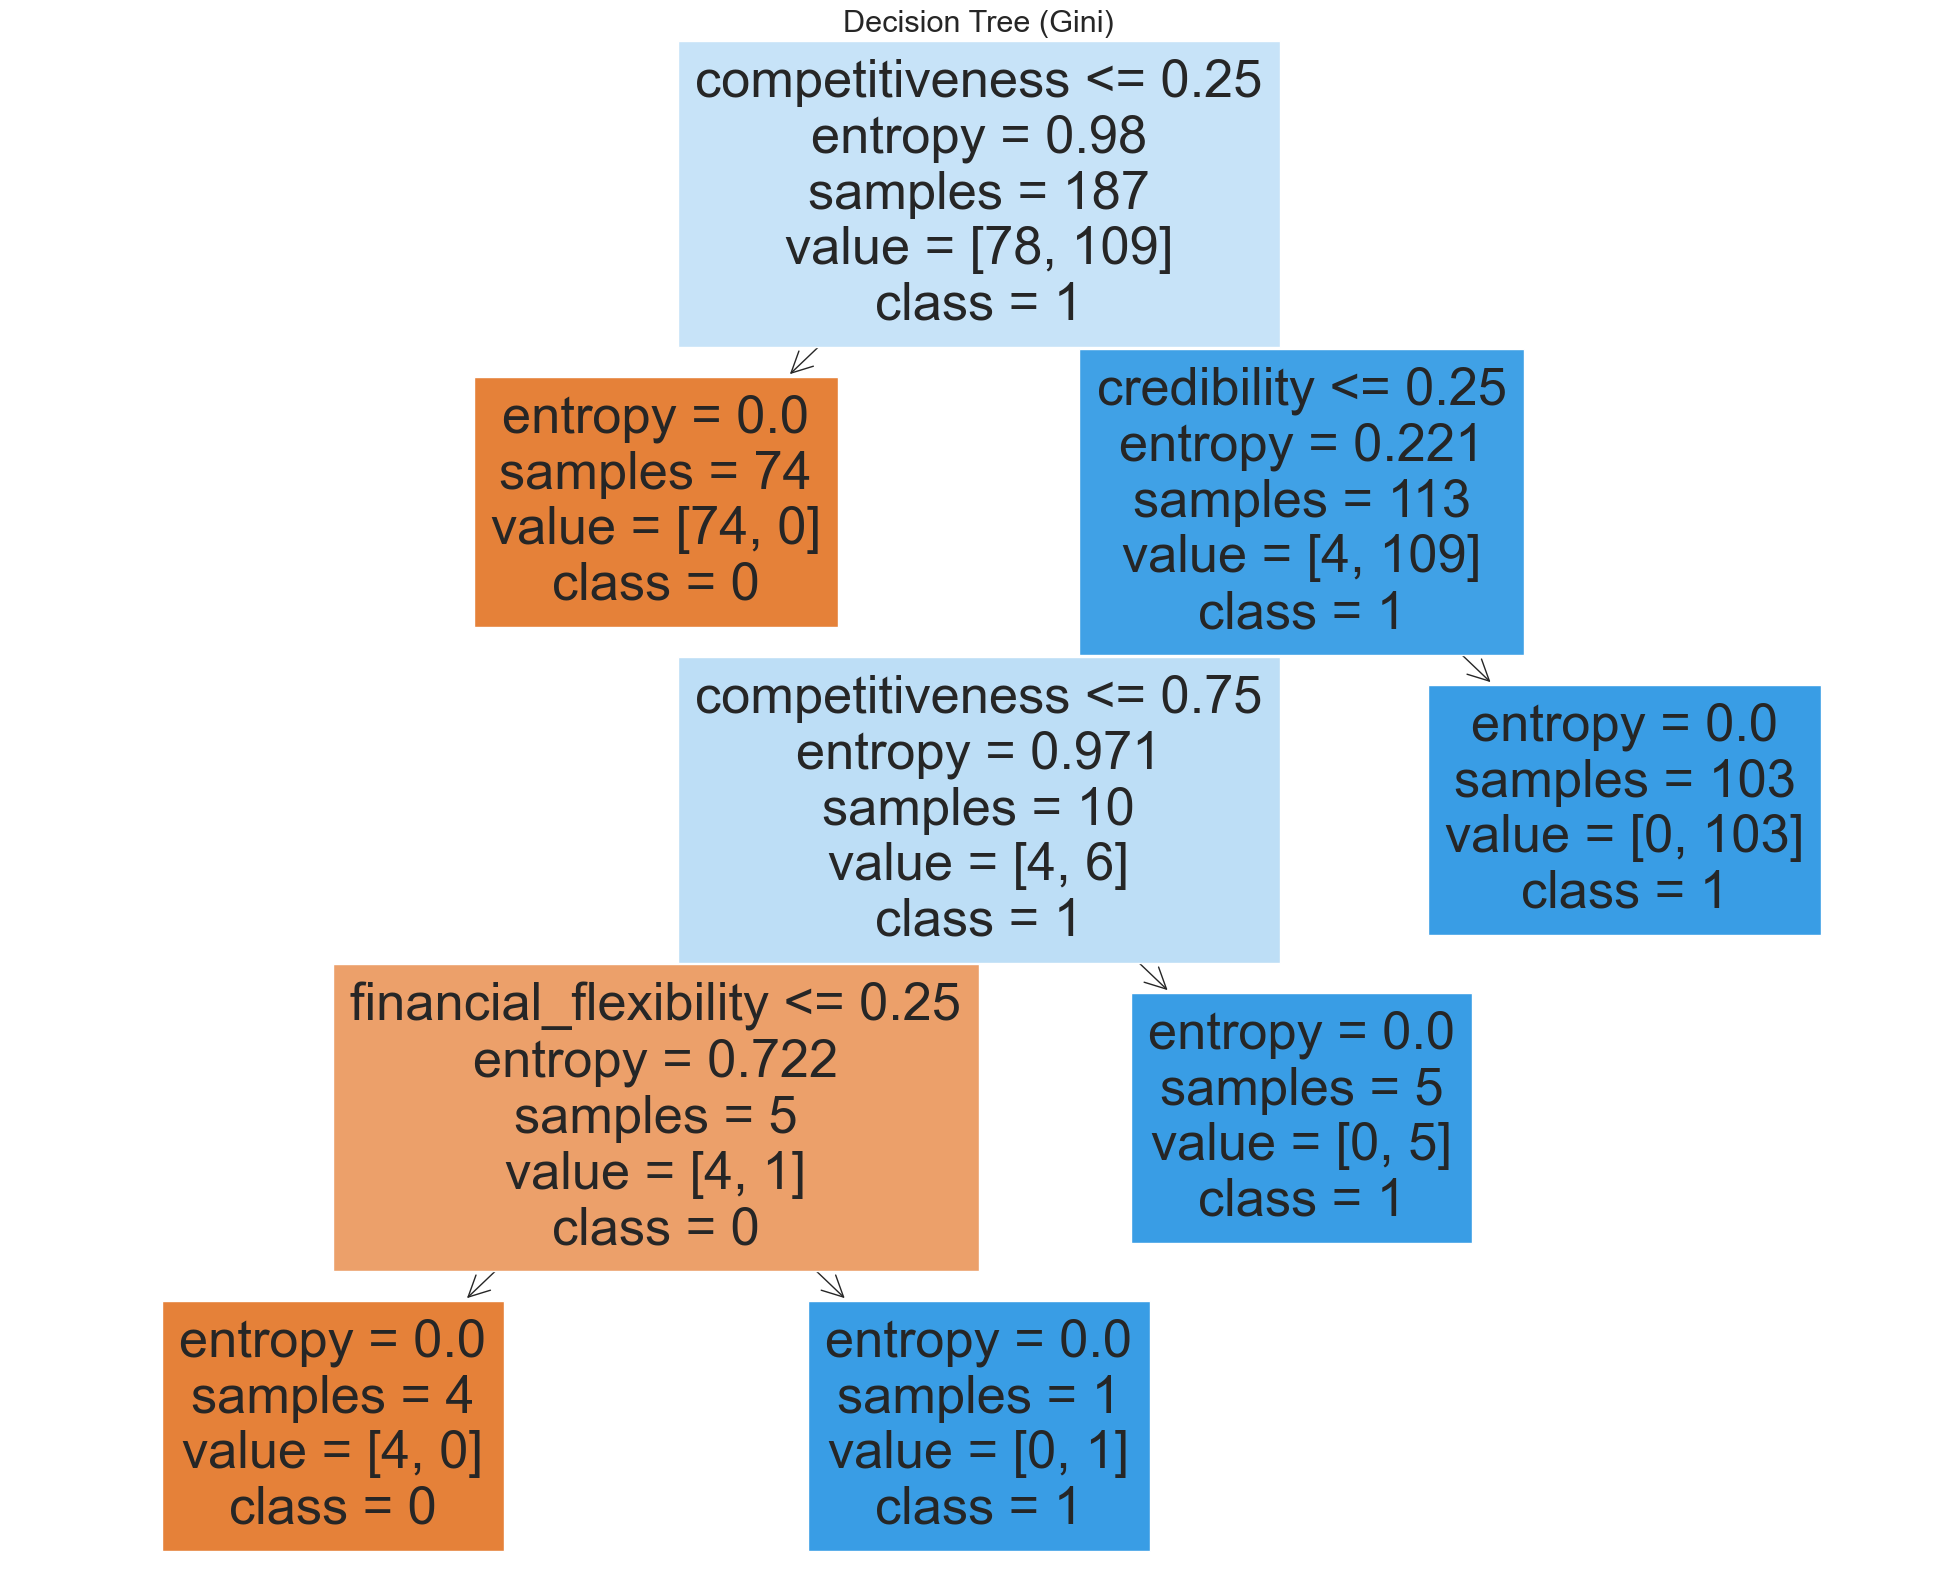

In [118]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(tree_model, feature_names=['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk'], class_names=['0','1'], filled=True, )
plt.title('Decision Tree (Gini)',fontsize=22)

### Using Bagging Technique

In [119]:
from sklearn.ensemble import BaggingClassifier

In [120]:
num_trees = 100

In [121]:
seed = 20

In [122]:
bag_kfold = KFold(n_splits=20, random_state=seed, shuffle=True)

In [123]:
cart = DecisionTreeClassifier()

In [124]:
bagg_model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

In [125]:
bagg_results = cross_val_score(bagg_model, features, target, cv=kfold)
bagg_results

array([1.        , 1.        , 1.        , 0.84615385, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [126]:
print(bagg_results.mean())

0.9923076923076923


### Using AdaBoost Technique

In [127]:
from sklearn.ensemble import AdaBoostClassifier

In [128]:
ada_model = AdaBoostClassifier()

In [129]:
ada_model.fit(x_train, y_train)

AdaBoostClassifier()

In [130]:
ada_y_pred = ada_model.predict(x_test)

In [131]:
accuracy_score(y_test, ada_y_pred)

0.9841269841269841

In [132]:
confusion_matrix(y_test, ada_y_pred)

array([[28,  1],
       [ 0, 34]], dtype=int64)

In [133]:
print(classification_report(y_test, ada_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        34

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



### Using XGBoost Technique

In [134]:
import xgboost
from xgboost import XGBClassifier

In [135]:
xgb_model = XGBClassifier()

In [136]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [137]:
xgb_y_pred = xgb_model.predict(x_test)

In [138]:
accuracy_score(y_test, xgb_y_pred)

1.0

In [139]:
confusion_matrix(y_test, ada_y_pred)

array([[28,  1],
       [ 0, 34]], dtype=int64)

In [140]:
print(classification_report(y_test, ada_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        34

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



In [141]:
data_model_acc = pd.DataFrame({'Models':['Logistic', 'SVM', 'Grid Search CV', 'KNN', 'Random Forest',
                                         'Decision Tree', 'Bagging Technique', 'AdaBoost Technique', 'XGBoost Technique'],
                            'Accuracy (in %)':[accuracy_score(y_test, log_pred), accuracy_score(y_test, svc_pred),
                                        accuracy_score(y_test, log_pred), accuracy_score(y_test, knn_y_pred),
                                        np.mean(results), accuracy_score(y_test, tree_y_pred), bagg_results.mean(),
                                        accuracy_score(y_test, ada_y_pred), accuracy_score(y_test, xgb_y_pred)

                                        ] })

data_model_acc

,Models,Accuracy (in %)
0,Logistic,0.984127
1,SVM,0.984127
2,Grid Search CV,0.984127
3,KNN,0.984127
4,Random Forest,0.992308
5,Decision Tree,1.000000
6,Bagging Technique,0.992308
7,AdaBoost Technique,0.984127
8,XGBoost Technique,1.000000


# Model Deployment

In [142]:
log_model = LogisticRegression()

In [143]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [144]:
log_pred = log_model.predict(x_test)

In [145]:
accuracy_score(y_test, log_pred)

0.9841269841269841

In [146]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [147]:
import pickle
import streamlit as st
import pandas as pd
import numpy as np

In [148]:
pickle_out = open("model_poly.pkl","wb")
pickle.dump(log_model, pickle_out)
pickle_out.close()

In [149]:
!pip install -q streamlit
!npm install -g localtunnel -U

'npm' is not recognized as an internal or external command,
operable program or batch file.


In [150]:
import numpy as np
import pickle
import pandas as pd
import streamlit as st

from PIL import Image

pickle_in = open("/content/model_poly.pkl", "rb")
classifier = pickle.load(pickle_in)

def welcome():
    return "Welcome All"

def predict_bankruptcy(industrial_risk, management_risk, financial_flexibility, credibility, competitiveness, operating_risk):
    prediction = classifier.predict([[industrial_risk, management_risk, financial_flexibility, credibility, competitiveness, operating_risk]])
    print(prediction)
    return prediction

def main():
#     st.title("Bankruptcy Detector")
    html_temp = """
    <div style="background-color:#cdb4db;padding:10px">
    <h2 style="color:white;text-align:center;">Bankruptcy Detector</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)
    industrial_risk = st.text_input("Industrial Risk", value="")
    management_risk = st.text_input("Management Risk", value="")
    financial_flexibility = st.text_input("Financial Flexibility", value="")
    credibility = st.text_input("Credibility", value="")
    competitiveness = st.text_input("Competitiveness", value="")
    operating_risk = st.text_input("Operating Risk", value="")
    result = ""
    if st.button("Predict"):
        industrial_risk = float(industrial_risk)
        management_risk = float(management_risk)
        financial_flexibility = float(financial_flexibility)
        credibility = float(credibility)
        competitiveness = float(competitiveness)
        operating_risk = float(operating_risk)

        prediction = predict_bankruptcy(
            industrial_risk, management_risk, financial_flexibility,
            credibility, competitiveness, operating_risk
        )
        if prediction == 0:
            result = "The Company is Bankrupted"
        else:
            result = "The Company is Not Bankrupted"

    st.success('Prediction: {}'.format(result))
#     if st.button("About"):
#         st.text("Let's Learn")
#         st.text("Built with Streamlit")

if __name__ == '__main__':
    main()


FileNotFoundError: [Errno 2] No such file or directory: '/content/model_poly.pkl'

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501